In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/alxmamaev/flowers-recognition?resource=download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imhatimkhan
Your Kaggle Key: ··········


100%|██████████| 225M/225M [00:06<00:00, 37.5MB/s]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [ ]:
img_size = 256
batch = 64

In [ ]:
# Create a data augmentor
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
								zoom_range=0.2, horizontal_flip=True,
								validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255,
								validation_split=0.2)

# Create datasets
train_datagen = train_datagen.flow_from_directory('/content/flowers-recognition/flowers',
												target_size=(
													img_size, img_size),
												subset='training',
												batch_size=batch)
test_datagen = test_datagen.flow_from_directory('/content/flowers-recognition/flowers',
												target_size=(
													img_size, img_size),
												subset='validation',
												batch_size=batch)


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [ ]:
# training_ds , validation_ds=keras.utils.image_dataset_from_directory(
#     directory= '/content/flowers-recognition/flowers',
#     labels = 'inferred',
#     label_mode = 'int',
#     batch_size = 32,
#     image_size = (256,256),
#     validation_split = 0.25,
#     subset = 'both',
#     seed= 32
# )

In [ ]:
# #normalize
# def process(image, label):
#   image = tf.cast(image/255. , tf.float32)
#   return image, label

# training_ds = training_ds.map(process)
# validation_ds = validation_ds.map(process)

In [ ]:
from keras.backend import dropout
# Creating CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding= 'valid', activation='relu', input_shape = (256,256,3)))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding = 'valid'))

model.add(Conv2D(64, kernel_size = (3,3), padding= 'valid', activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding = 'valid'))

model.add(Conv2D(128, kernel_size = (3,3), padding= 'valid', activation='relu',))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides=2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(64, activation= 'relu'))
#model.add(Dropout(0.1))
model.add(Dense(5, activation= 'softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

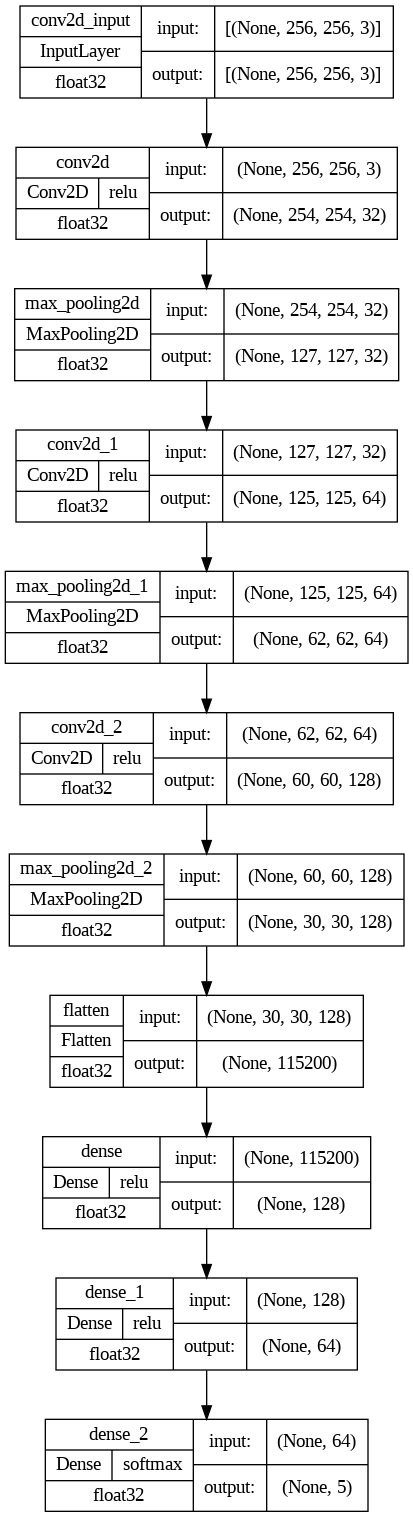

In [ ]:
keras.utils.plot_model(
	model,
	show_shapes = True,
	show_dtype = True,
	show_layer_activations = True
)


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(train_datagen,epochs=10, validation_data=test_datagen)

Epoch 1/10
55/55 [==============================] - 69s 1s/step - loss: 0.9574 - accuracy: 0.6106 - val_loss: 0.9465 - val_accuracy: 0.6442
Epoch 2/10
55/55 [==============================] - 66s 1s/step - loss: 0.8715 - accuracy: 0.6610 - val_loss: 0.9612 - val_accuracy: 0.6233
Epoch 3/10
55/55 [==============================] - 66s 1s/step - loss: 0.7837 - accuracy: 0.6983 - val_loss: 0.9120 - val_accuracy: 0.6547
Epoch 4/10
55/55 [==============================] - 69s 1s/step - loss: 0.7366 - accuracy: 0.7139 - val_loss: 0.8779 - val_accuracy: 0.6791
Epoch 5/10
55/55 [==============================] - 67s 1s/step - loss: 0.6882 - accuracy: 0.7316 - val_loss: 0.8859 - val_accuracy: 0.6767
Epoch 6/10
55/55 [==============================] - 66s 1s/step - loss: 0.6237 - accuracy: 0.7677 - val_loss: 0.9510 - val_accuracy: 0.6779
Epoch 7/10
55/55 [==============================] - 67s 1s/step - loss: 0.6152 - accuracy: 0.7703 - val_loss: 0.8779 - val_accuracy: 0.6919
Epoch 8/10
55/55 [==

In [ ]:
from tensorflow.keras.models import load_model
model.save('Model.h5')

# load model
savedModel=load_model('Model.h5')


In [ ]:
train_datagen.class_indices


{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


1/1 [==============================] - 0s 121ms/step
[[0. 0. 1. 0. 0.]]
Rose


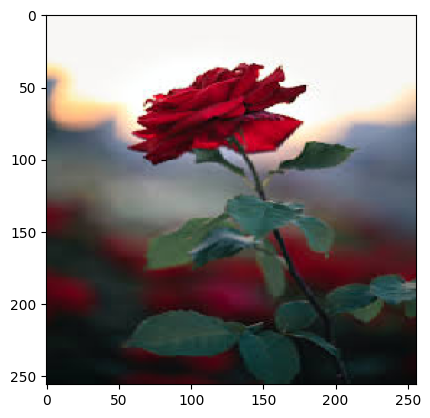

In [ ]:
import keras.utils as image

#Creating list for mapping
list_ = ['Daisy','Danelion','Rose','sunflower', 'tulip']

#Input image
test_image = image.load_img('image.jpeg',target_size=(256,256))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
  if(result[0][i]==1):
    print(list_[i])
    break
